In [1]:
# Librerías necesarias 

import numpy as np # Para cálculos numéricos
import matplotlib.pyplot as plt # Para graficar



# Método de Euler para la Humedad de la Lombricompostera

Se implementa el método de Euler para simular cómo cambia la
humedad de la lombricompostera con el tiempo.

El primer valor real tomado por el sensor fue:

**H₀ = 66.26%**

El sensor mide humedad cada **1.2 segundos**, durante aproximadamente **5 minutos** (300 segundos), lo que equivale a unos **250 pasos** de simulación.


In [5]:
# Parámetros del modelo

H0 = 66.26      # humedad inicial (primer dato real del sensor)
H_ideal = 82.5  # humedad óptima del sistema (promedio del rango 80-85%)
k = 0.1         # constante de ajuste del modelo (controla la velocidad de cambio)
dt = 1.2        # paso de tiempo en segundos (frecuencia del sensor)
N = 250         # número de pasos (300 s / 1.2 s ≈ 250)


# Modelo matemático usado

Para simular cómo cambia la humedad con el tiempo, usamos una ecuación que
describe lo siguiente: la humedad siempre tiende a acercarse a un valor ideal.
En nuestro caso, ese valor ideal es 82.5%.

La ecuación que se utilizó es:

dH/dt = k (H_ideal - H)

Esto significa que el cambio de humedad depende de qué tan lejos está del valor ideal. Si la humedad está muy baja, el cambio será grande; si está cerca del ideal, el cambio será pequeño.

El método de Euler permite aproximar esta ecuación paso a paso usando:

H(t+1) = H(t) + dt * k * (H_ideal - H(t))

De esta forma se puede calcular la humedad cada 1.2 segundos, igual que lo hizo el sensor real.


In [18]:

# Demostración del método de Euler (solo 1 paso)

# 1. Tomamos la humedad inicial (primer dato real)
H_actual = H0
print("1) Humedad inicial (H_actual):", H_actual)

# 2. Calculamos cuánto cambia la humedad (derivada)
#    Fórmula del modelo: dH/dt = k * (H_ideal - H_actual)
dH_dt = k * (H_ideal - H_actual)
print("2) Derivada dH/dt:", dH_dt)

# 3. Aplicamos la fórmula del método de Euler
#    H_nueva = H_actual + dt * dH_dt
H_nueva = H_actual + dt * dH_dt
print("3) Nueva humedad (H_nueva):", H_nueva)


1) Humedad inicial (H_actual): 66.26
2) Derivada dH/dt: 1.6239999999999997
3) Nueva humedad (H_nueva): 68.20880000000001


In [21]:

# Implementación completa del método de Euler

# Listas donde se guardan todos los valores
H = [H0]   # humedad simulada
t = [0]    # tiempo en segundos

# Hacemos N pasos del método de Euler
for i in range(1, N):

    # Tomamos el valor anterior de humedad
    H_actual = H[i-1]

    # Calculamos la derivada (cambio de humedad)
    dH_dt = k * (H_ideal - H_actual)

    # Calculamos el nuevo valor de humedad
    H_nueva = H_actual + dt * dH_dt

    # Guardamos los resultados
    H.append(H_nueva)
    t.append(i * dt)

# Mostrar los primeros 10 valores simulados
for paso in range(10):
    humedad_en_este_paso = H[paso]
    print("Paso", paso, "H =", humedad_en_este_paso)


Paso 0 H = 66.26
Paso 1 H = 68.20880000000001
Paso 2 H = 69.92374400000001
Paso 3 H = 71.43289472000001
Paso 4 H = 72.7609473536
Paso 5 H = 73.929633671168
Paso 6 H = 74.95807763062784
Paso 7 H = 75.8631083149525
Paso 8 H = 76.6595353171582
Paso 9 H = 77.36039107909922


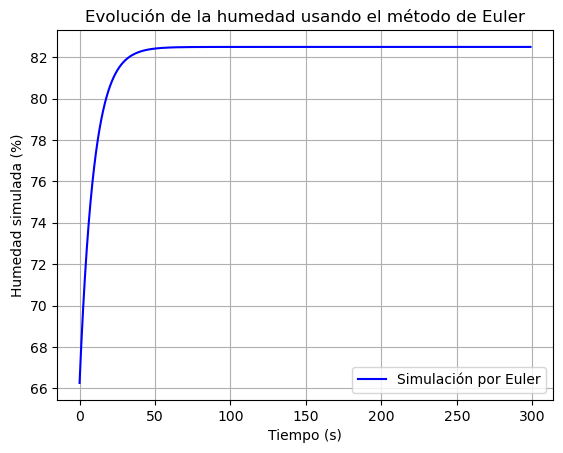

In [22]:
# Gráfica de la simulación

plt.plot(t, H, label="Simulación por Euler", color="blue")

# Etiquetas de los ejes
plt.xlabel("Tiempo (s)")  # nombre eje x
plt.ylabel("Humedad simulada (%)")  # nombre eje y

# Título de la gráfica
plt.title("Evolución de la humedad usando el método de Euler")

# Mostrar cuadriculado para que sea más fácil de leer
plt.grid(True)

# Mostrar la leyenda (texto azul arriba)
plt.legend()

# Mostrar la gráfica en pantalla
plt.show()


# Explicación del resultado final

La gráfica muestra como evoluciona la humedad simulada con respecto al tiempo, usando el método de Euler. Inicialmente, se registró el primer valor tomado en la lombricompostera que fue de 66,26%, rango que se encuentra por debajo del óptimo de 82.5%. A medida del tiempo el porcentaje se acerca al valor ideal, mostrando asi como el sistema tendría que estabilizarse.